

## CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - Phần 01
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='500px'>

---
*Copyright Đặng Văn Nam FIT.HUMG*

# A| Phân loại (Classification)

## I) THUẬT TOÁN KNN
---
Bản chất, KNN là thuật toán đi tìm đầu ra cuả một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong tập huấn luyện gần nó nhất (K-lân cận)

<img src='pic/knn.png' width='300px'>

**Xác định người láng giềng gần nhất:**
<img src='pic/knn1.png' width='400px'>

**Tính khoảng cách giữa 2 điểm A-B:**
<img src='pic/distance1_knn.png' width='400px'>
<img src='pic/distance2_knn.png' width='200px'>

Ưu điểm:
* Độ phức tạp tính toán trong quá trình huấn luyện bằng 0
* Việc dự đoán kết quả của dữ liệu mới rất đơn giản
* Không cần giả sử gì về phân phối của các class

Nhược điểm:
* KNN rất nhạy với nhiễu khi K nhỏ.
* Tính toán khoảng cách tới từng điểm dữ liệu trong trong tập huấn luyện tốn rất nhiều thời gian, đặc biệt với các CSDL có số chiều lớn và có nhiều điểm dữ liệu. K càng lớn thì độ phức tạp càng tăng.
* Lưu toàn bộ dữ liệu trong bộ nhớ ảnh hưởng tới hiệu năng của KNN

học có giám sát -> có gán nhãn: 
+ phân lớp
    * nhị phân
    * phân lớp đa lớp
+ hồi quy

## VÍ DỤ THỰC HÀNH 1:
## PHÂN LOẠI HOA LAN VỚI THUẬT TOÁN KNN
---
Tập dữ liệu bao gồm 150 mẫu về thông số chiều rộng, chiều dài của lá hóa và cánh hoa của 3 loại hoa Lan được gán nhãn:
* 0 - Setosa (50 mẫu)
* 1 - Vericolor (50 mẫu)
* 2 - Virginica (50 mẫu)

<img src='pic/iris.png' width='400px'>

### 1. Đọc dữ liệu mẫu từ Sklearn
* X_iris: chứa các feature đầu vào (input)
* y_iris: chứa label đầu ra (target)

In [1]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color1=sns.color_palette()

#-------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
#1. ĐỌC DỮ LIỆU MẪU VÀO BIẾN DATAFRAME (Chương 2)
#Đọc tập dữ liệu mẫu Iris Dataset từ thư viện Sklearn:
from sklearn.datasets import load_iris

data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['label'] = data['target']
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [3]:
#Hiển thị 5 dòng đâu tiên của dữ liệu
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df_iris.iloc[98:103,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


In [5]:
#Hiển thị 5 dòng cuối cùng của dữ liệu:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
#Quan sát đặc trưng thống kê của tập dữ liệu
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


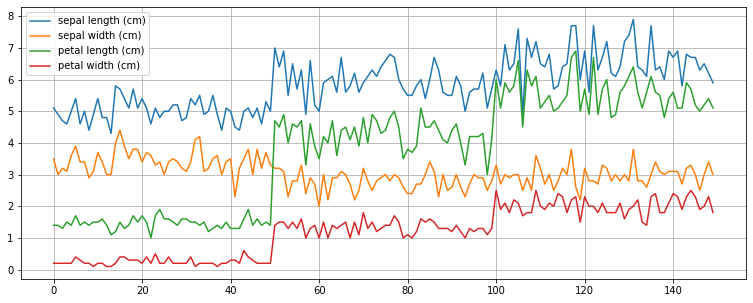

In [7]:
#View dữ liệu các thuộc tính độc lập
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,5))
plt.plot(df_iris.iloc[:,:4])
plt.legend(['sepal length (cm)',
            'sepal width (cm)',
            'petal length (cm)',
            'petal width (cm)'])
plt.grid(True)
plt.show()

0    50
1    50
2    50
Name: label, dtype: int64


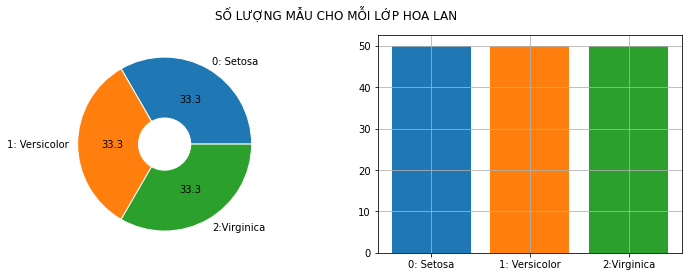

In [9]:
#Kiểm tra cân bằng dữ liệu
x = df_iris['label'].value_counts()
print(x)
#Trực quan hóa số liệu
label=['0: Setosa', '1: Versicolor', '2:Virginica']
fig = plt.figure(figsize=(12,4))
plt.suptitle('SỐ LƯỢNG MẪU CHO MỖI LỚP HOA LAN')
plt.subplot(1,2,1)
plt.pie(x, labels=label,
        autopct='%.1f',
        colors = color1,
        wedgeprops=dict(width=0.7,edgecolor='w'))

plt.subplot(1,2,2)
plt.bar(label,x,
        color=color1)
plt.grid(True)
plt.show()

#--->Tập dữ liệu cân bằng, mỗi lớp chiếm 33.3%
# 150 mẫu chia đều cho 3 mẫu

**Phân tách biến độc lập và biến phụ thuộc:**
* Biến độc lập (feature input):  
    * 'sepal length (cm)',
    * 'sepal width (cm)',
    * 'petal length (cm)',
    * 'petal width (cm)'
* Biến phụ thuộc (Target/Label): label

In [10]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [11]:
#Phân tách Biến độc lập:
X_iris = df_iris.loc[:,['sepal length (cm)', 
                        'sepal width (cm)', 
                        'petal length (cm)',
                        'petal width (cm)']].values

#Phân tách biến phụ thuộc:
y_iris = df_iris.loc[:,['label']].values.ravel()

print('Kích thước biến độc lập X(features):', X_iris.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_iris.shape)

Kích thước biến độc lập X(features): (150, 4)
Kích thước biến phụ thuộc y(target)   : (150,)


In [12]:
#Biến độc lập:
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
#Biến phụ thuộc:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
#Hiển thị dữ liệu 1 vài mẫu
print('Bộ dữ liệu 1)  ', X_iris[1,:], '--',y_iris[1])
print('Bộ dữ liệu 55) ', X_iris[55,:], '--',y_iris[55])
print('Bộ dữ liệu 111)', X_iris[111,:], '--',y_iris[111])

Bộ dữ liệu 1)   [4.9 3.  1.4 0.2] -- 0
Bộ dữ liệu 55)  [5.7 2.8 4.5 1.3] -- 1
Bộ dữ liệu 111) [6.4 2.7 5.3 1.9] -- 2


### 2. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (70%)
* Test: dùng để kiểm thử mô hình (30%)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, 
                                                    y_iris,
                                                    test_size=0.3,
                                                    random_state=42)

print("1. Kích thước tập Training: ", len(y_train))
print("2. Kích thước tập Test    : ",len(y_test))
# random_state mục đích: lấy ngẫu nhiên 105 mẫu trong 150 mẫu (40 -> 60)

1. Kích thước tập Training:  105
2. Kích thước tập Test    :  45


In [16]:
#Các mẫu Dữ liệu trong tập X_test:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [17]:
#Dữ liệu trong tập y_test:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [18]:
0.7*150

105.0

## 3. Sử dụng mô hình KNN cho bài toán phân lớp
---

In [19]:
#Khai báo sử dụng thuật toán KNN cho bài toán phân lớp:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN sử dụng các tham số mặc định
KNN_iris = KNeighborsClassifier()

#Hiển thị danh sách các tham số của thuật toán:
KNN_iris.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
# p: thiết lập cách tính khoảng cách p = 2 là ec p=1 là mada
# weights: trong số

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


In [20]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_iris.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_iris.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 95.24


## 4. Đánh giá độ chính xác của mô hình phân loại:
---

Cách đơn giản và hay được sử dụng nhất là Accauracy: Tính tỷ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [23]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_iris.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Ground truth    :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [24]:
#Sử dụng module accuracy_score trong thư viện sklearn để đánh giá độ chính xác:
#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp hoa lan (k=5 default):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp hoa lan (k=5 default): 1.0
Độ chính xác theo %: 100.0


# dữ liệu mẫu sạch
# dữ liệu quá ít

In [25]:
# Số liệu cho biết tổng số mẫu dự đoán đúng trên tập Test
acc2 = accuracy_score(y_test, y_pred,normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 45  / 45


# 5. Sử dụng mô hình dự đoán cho mẫu mới:
---
Giả sử có một mẫu hoa mới có các thông số sau:
<img src='Pic/Iris.jpg' width='300px'>
* sepal length (cm): 1.8
* sepal width (cm):  2.0
* petal length (cm): 1.2
* petal width (cm): 2.1


In [26]:
import numpy as np

#Khai báo thông số của Mẫu hoa lan mới
a_array = np.array([(1.8, 2.0, 3.2, 2.1)])
print(a_array.shape)
print(a_array)

(1, 4)
[[1.8 2.  3.2 2.1]]


In [27]:
#Sử dụng mô hình huấn luyện được để dự báo cho mẫu mới:
label = KNN_iris.predict(a_array)

#Hiển thị kết quả:
print(label)
if label==0:
    print('ML said: New Sample is 0-Setosa')
elif (label==1):
    print('ML said: New Sample is 1-Versicolor')
elif (label==2):
    print('ML said: New Sample is 2-Virginica')

[1]
ML said: New Sample is 1-Versicolor


## B| THỰC HÀNH TRÊN LỚP:
---
Sử dụng dữ liệu đã được tiền xử lý trong tập Data_titanic_ok.csv của chương 2. 
* Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách với thuật toán KNN.
* Tùy chỉnh tham số của mô hình để độ chính xác trên cả tập Train và Test cao nhất có thể (Best Fit)
<img src='Pic/titanic.jpg'>



## B.1 Đọc và quan sát tập dữ liệu:
---

In [2]:
#Đọc tập dữ liệu đã xử lý trong chương 2
path_titanic ="Data/Data_Titanic_ok.csv"
df_titanic = pd.read_csv(path_titanic)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [3]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [4]:
df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1304,0,3,0,1,0,0,0
1305,1,1,1,2,0,0,1
1306,0,3,0,2,0,0,0
1307,0,3,0,1,0,0,0
1308,0,3,0,1,1,1,1


In [5]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,0.355997,1.324675,0.498854,0.385027,0.394194
std,0.484918,0.837836,0.478997,0.803763,1.041658,0.865560,0.653499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,9.000000,2.000000


## B.2 Kiểm tra cân bằng của tập dữ liệu:
---

In [7]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [9]:
# thuc hien dem
c_titanic = df_titanic['Survived'].value_counts()
print(c_titanic)

0    815
1    494
Name: Survived, dtype: int64


0    815
1    494
Name: Survived, dtype: int64


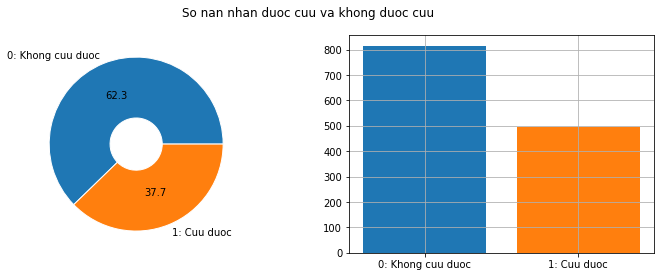

In [10]:
#Kiểm tra cân bằng dữ liệu
x = df_titanic['Survived'].value_counts()
print(x)
#Trực quan hóa số liệu
label=['0: Khong cuu duoc', '1: Cuu duoc']
fig = plt.figure(figsize=(12,4))
plt.suptitle('So nan nhan duoc cuu va khong duoc cuu')
plt.subplot(1,2,1)
plt.pie(x, labels=label,
        autopct='%.1f',
        colors = color1,
        wedgeprops=dict(width=0.7,edgecolor='w'))

plt.subplot(1,2,2)
plt.bar(label,x,
        color=color1)
plt.grid(True)
plt.show()

#--->Tập dữ liệu cân bằng, mỗi lớp chiếm 33.3%
# 150 mẫu chia đều cho 3 mẫu

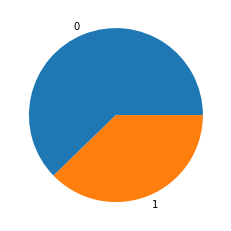

In [42]:
# truc quan hoa du lieu
plt.pie(c_titanic.values,labels= c_titanic.index)
plt.show()

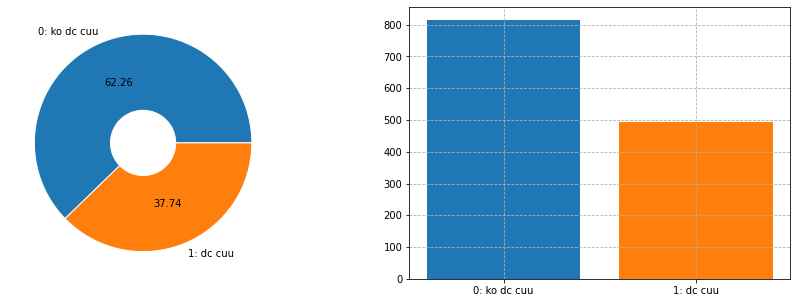

In [11]:

#Trực quan hóa số liệu
label=['0: ko dc cuu', '1: dc cuu']
fig = plt.figure(figsize=(15,5))
# plt.suptitle('SỐ LƯỢNG MẪU CHO MỖI LỚP HOA LAN')
plt.subplot(1,2,1)
plt.pie(c_titanic, labels=label,
        autopct='%.2f',
        colors = color1,
        wedgeprops=dict(width=0.7,edgecolor='w'))

plt.subplot(1,2,2)
plt.bar(label,c_titanic.values,
        color=color1)
plt.grid(ls='--')
plt.show()

In [ ]:
# nhan xet: tap du lieu titanic mat can bang trung binh lop 0 co ti le gap 2 lan lop 1

## B.3 Phân tách biến độc lập và biến phụ thuộc:
---

In [12]:
df_titanic.columns



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [13]:
# tach bien doc lap
X_titanic = df_titanic.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values

print(X_titanic)

[[3 0 1 1 0 0]
 [1 1 2 1 0 1]
 [3 1 1 0 0 0]
 ...
 [3 0 2 0 0 0]
 [3 0 1 0 0 0]
 [3 0 1 1 1 1]]


In [14]:
#Phân tách biến phụ thuộc:
y_titanic = df_titanic.loc[:,['Survived']].values.ravel()
print(y_titanic)

[0 1 1 ... 0 0 0]


## B.4 Tách tập dữ liệu Train - Test:
---

In [30]:
from sklearn.model_selection import train_test_split
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, 
                                                    y_titanic,
                                                    test_size=0.25,
                                                    random_state=42)

print("1. Kích thước tập Training: ", len(y_titanic_train))
print("2. Kích thước tập Test    : ",len(y_titanic_test))
# random_state mục đích: lấy ngẫu nhiên 105 mẫu trong 150 mẫu (40 -> 60)

1. Kích thước tập Training:  981
2. Kích thước tập Test    :  328


# B.5 khai bao mo hinh knn

In [17]:
#Khai báo sử dụng thuật toán KNN cho bài toán phân lớp:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN sử dụng các tham số mặc định
KNN_titanic = KNeighborsClassifier(n_neighbors= 7)


#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [18]:
KNN_titanic_test = KNeighborsClassifier()
KNN_titanic_test.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# B.6: Huan luyen mo hinh

In [19]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic.fit(X_titanic_train,y_titanic_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_titanic.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 86.44


# B.7: DAnh gia do chinh xac cua mo hinh


In [21]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:10])
print("Gia tri that   : ", y_titanic_test[:10])

Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1]


In [23]:
# tinh do chinh xac cua toan bo tap test
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
# ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
# y_pred = [0, 2, 1, 3]
# y_true = [0, 1, 2, 3]
# print(len(y_titanic_test))
# print(len(y_titanic_pred))
# y_titanic_pred
ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Do chinh xac tren tap test:  85.67


In [73]:
# khai bao mo hinh KNN moi, thay doi tham so
# n_neighbors: 7, 9, 11, 15
# p: 1 , 2
# weights: 'uniform, distance'
KNN_titanic.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

<h1><center>Thay doi tham so</center></h1>

# Bo du lieu 1 (n_neighbors = 7, p = 1, weights: uniform)

In [24]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 7, p = 1, weights: uniform

KNN_titanic_test_one = KNeighborsClassifier(n_neighbors= 7, p = 1, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_one.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [25]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_one.fit(X_titanic_train,y_titanic_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [26]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_one = KNN_titanic_test_one.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 86.44


In [27]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_one.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:10])
print("Gia tri that   : ", y_titanic_test[:10])

Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1]


In [28]:
# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Do chinh xac tren tap test:  85.37


# Bo du lieu 2 (n_neighbors = 9, p = 1, weights: uniform)

In [29]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 9, p = 1, weights: uniform

KNN_titanic_test_two = KNeighborsClassifier(n_neighbors= 9, p = 1, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_two.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_two.fit(X_titanic_train,y_titanic_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [33]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_two.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 86.44


In [34]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_two.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:10])
print("Gia tri that   : ", y_titanic_test[:10])

Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1]


In [35]:
# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Do chinh xac tren tap test:  86.59


# Bo du lieu 3 (n_neighbors = 11, p = 1, weights: uniform)

In [49]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 11, p = 1, weights: uniform

KNN_titanic_test_three = KNeighborsClassifier(n_neighbors= 11, p = 1, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_three.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_three.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_three.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_three.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:10])
print("Gia tri that   : ", y_titanic_test[:10])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1]
Do chinh xac tren tap test:  86.59


# Bo du lieu 4 (n_neighbors = 15, p = 1, weights: uniform)

In [50]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 15, p = 1, weights: uniform

KNN_titanic_test_four = KNeighborsClassifier(n_neighbors= 15, p = 1, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_four.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_four.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_four.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_four.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:15])
print("Gia tri that   : ", y_titanic_test[:15])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0 0 0 0 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0]
Do chinh xac tren tap test:  86.28


# Bo du lieu 5 (n_neighbors = 7, p = 2, weights: uniform)

In [51]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 7, p = 2, weights: uniform

KNN_titanic_test_five = KNeighborsClassifier(n_neighbors= 7, p = 2, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_five.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_five.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_five.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_five.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:15])
print("Gia tri that   : ", y_titanic_test[:15])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0]
Do chinh xac tren tap test:  85.67


# Bo du lieu 6 (n_neighbors = 9, p = 2, weights: uniform)

In [52]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 9, p = 2, weights: uniform

KNN_titanic_test_6 = KNeighborsClassifier(n_neighbors= 9, p = 2, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_6.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_6.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_6.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_6.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  86.59


# Bo du lieu 7 (n_neighbors = 11, p = 2, weights: uniform)

In [53]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 11, p = 2, weights: uniform

KNN_titanic_test_7 = KNeighborsClassifier(n_neighbors= 11, p = 2, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_7.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_7.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_7.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_7.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  85.67


# Bo du lieu 8 (n_neighbors = 15, p = 2, weights: uniform)

In [54]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 15, p = 2, weights: uniform

KNN_titanic_test_8 = KNeighborsClassifier(n_neighbors= 15, p = 2, weights='uniform')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_8.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_8.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_8.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_8.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  85.06


# Bo du lieu 9 (n_neighbors = 7, p = 1, weights: distance)

In [55]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 7, p = 1, weights: distance

KNN_titanic_test_9 = KNeighborsClassifier(n_neighbors= 7, p = 1, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_9.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_9.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_9.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_9.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.93


# Bo du lieu 10 (n_neighbors = 9, p = 1, weights: distance)¶

In [56]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 9, p = 1, weights: distance

KNN_titanic_test_10 = KNeighborsClassifier(n_neighbors= 9, p = 1, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_10.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_10.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_10.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_10.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.93


# Bo du lieu 11 (n_neighbors = 11, p = 1, weights: distance)

In [57]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 11, p = 1, weights: distance

KNN_titanic_test_11 = KNeighborsClassifier(n_neighbors= 11, p = 1, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_11.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_11.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_11.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_11.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  83.23


# Bo du lieu 12 (n_neighbors = 15, p = 1, weights: distance)

In [58]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 15, p = 1, weights: distance

KNN_titanic_test_12 = KNeighborsClassifier(n_neighbors= 15, p = 1, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_12.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_12.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_12.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_12.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.93


# Bo du lieu 13 (n_neighbors = 7, p = 2, weights: distance)

In [59]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 7, p = 2, weights: distance

KNN_titanic_test_13 = KNeighborsClassifier(n_neighbors= 7, p = 2, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_13.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_13.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_13.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_13.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.93


# Bo du lieu 14 (n_neighbors = 9, p = 2, weights: distance)¶

In [60]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 9, p = 2, weights: distance

KNN_titanic_test_14 = KNeighborsClassifier(n_neighbors= 9, p = 2, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_14.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_14.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_14.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_14.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  83.23


# Khai báo model KNN sử dụng các tham số n_neighbors = 11, p = 2, weights: distance

In [61]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 11, p = 2, weights: distance

KNN_titanic_test_15 = KNeighborsClassifier(n_neighbors= 11, p = 2, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_15.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_15.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_15.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_15.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.93


# Khai báo model KNN sử dụng các tham số n_neighbors = 15, p = 2, weights: distance

In [63]:
#Khai báo model KNN sử dụng các tham số n_neighbors = 15, p = 2, weights: distance

KNN_titanic_test_16 = KNeighborsClassifier(n_neighbors= 15, p = 2, weights='distance')
#Hiển thị danh sách các tham số của thuật toán:
KNN_titanic_test_16.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic_test_16.fit(X_titanic_train,y_titanic_train)

#Đánh giá độ chính xác trên tập huấn luyên:
acc_train_two = KNN_titanic_test_16.score(X_titanic_train,y_titanic_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_titanic_pred = KNN_titanic_test_16.predict(X_titanic_test)

print("Kết quả phân loại hanh khach trên tập dữ liệu TEST:")
print("Mo hinh du doan: ", y_titanic_pred[:25])
print("Gia tri that   : ", y_titanic_test[:25])

# tinh do chinh xac cua toan bo tap test
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_titanic_test, y_titanic_pred)
print('Do chinh xac tren tap test: ', round(ac_test*100,2))

Độ chính xác trên tập huấn luyện: 86.44
Kết quả phân loại hanh khach trên tập dữ liệu TEST:
Mo hinh du doan:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Gia tri that   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
Do chinh xac tren tap test:  82.62


# THỰC HÀNH 3.1: 
---
Sử dụng thuật toán KNN phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn (đã làm trong chương 2)
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán KNN để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
    - Sử dụng thuật toán KNN với các trường hợp: K= 5, 7, 11, 13 cho biết độ chính xác ứng với từng K đó trên tập Test.
    - Áp dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận. Cho biết độ chính xác của thuật toán trên tập Test và Ma trận confusion tương ứng.

In [1]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY!}

#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df_wine = pd.DataFrame(data['data'], columns=data['feature_names'])
df_wine['label'] = data['target']
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [65]:
#Hiển thị 5 dòng đâu tiên của dữ liệu
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [66]:
#Kiểm tra cân bằng dữ liệu
x = df_wine['label'].value_counts()
print(x)

1    71
0    59
2    48
Name: label, dtype: int64


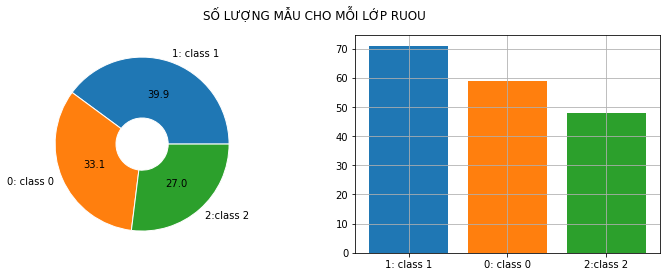

In [68]:
#Trực quan hóa số liệu
label=['1: class 1', '0: class 0', '2:class 2']
fig = plt.figure(figsize=(12,4))
plt.suptitle('SỐ LƯỢNG MẪU CHO MỖI LỚP RUOU')
plt.subplot(1,2,1)
plt.pie(x, labels=label,
        autopct='%.1f',
        colors = color1,
        wedgeprops=dict(width=0.7,edgecolor='w'))

plt.subplot(1,2,2)
plt.bar(label,x,
        color=color1)
plt.grid(True)
plt.show()

In [69]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

In [70]:
#Phân tách Biến độc lập:
X_wine = df_wine.loc[:,['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']].values

#Phân tách biến phụ thuộc:
y_wine = df_wine.loc[:,['label']].values.ravel()

print('Kích thước biến độc lập X(features):', X_wine.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_wine.shape)

Kích thước biến độc lập X(features): (178, 13)
Kích thước biến phụ thuộc y(target)   : (178,)


In [71]:
X_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [72]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [73]:
# Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, 
                                                    y_wine,
                                                    test_size=0.25,
                                                    random_state=42)

print("1. Kích thước tập Training: ", len(y_train))
print("2. Kích thước tập Test    : ",len(y_test))
# random_state mục đích: lấy ngẫu nhiên 105 mẫu trong 150 mẫu (40 -> 60)

1. Kích thước tập Training:  133
2. Kích thước tập Test    :  45


In [75]:
#Khai báo sử dụng thuật toán KNN cho bài toán phân lớp:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN sử dụng các tham số mặc định
KNN_wine = KNeighborsClassifier()

#Hiển thị danh sách các tham số của thuật toán:
KNN_wine.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [76]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_wine.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 76.69


In [78]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

print("Kết quả phân loại wine trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại wine trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 2 2 1 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 1]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [79]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp wine (k=5 default):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp wine (k=5 default): 0.7111111111111111
Độ chính xác theo %: 71.11


# k = 7

In [80]:

#Khai báo model KNN sử dụng các tham số k = 7
KNN_wine = KNeighborsClassifier(n_neighbors=7)

#Hiển thị danh sách các tham số của thuật toán:
KNN_wine.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [81]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [82]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_wine.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 78.95


In [83]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

print("Kết quả phân loại wine trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại wine trên tập dữ liệu TEST:
Predicted labels:  [0 0 2 0 1 0 1 2 2 0 2 2 0 1 0 1 1 2 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [84]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp wine (k=7):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp wine (k=7): 0.7333333333333333
Độ chính xác theo %: 73.33


# k = 11

In [93]:

#Khai báo model KNN sử dụng các tham số k = 11
KNN_wine = KNeighborsClassifier(n_neighbors=11)

#Hiển thị danh sách các tham số của thuật toán:
KNN_wine.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=11)

In [94]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_wine.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 74.44


In [95]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

print("Kết quả phân loại wine trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại wine trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 2 0 2 0 0 2 0 1 0 1 1 2 0 1 0 1 2 2 1 2 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [96]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp wine (k=11):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp wine (k=11): 0.7111111111111111
Độ chính xác theo %: 71.11


# k = 13

In [97]:

#Khai báo model KNN sử dụng các tham số k = 13
KNN_wine = KNeighborsClassifier(n_neighbors=13)

#Hiển thị danh sách các tham số của thuật toán:
KNN_wine.get_params()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=13)

In [98]:
#Đánh giá độ chính xác trên tập huấn luyên:
acc_train = KNN_wine.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 73.68


In [99]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

print("Kết quả phân loại wine trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại wine trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 2 0 2 0 0 2 0 1 0 1 1 2 0 1 0 1 2 2 1 2 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [100]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp wine (k=11):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp wine (k=11): 0.7111111111111111
Độ chính xác theo %: 71.11
